In [75]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [76]:
#NN vectors 
a1 = 0.5*(np.array([1, np.sqrt(3)]))
a2 = 0.5*(np.array([1, -np.sqrt(3)]))
a3 = 0.5*(np.array([-1,0]))

#NNN vectors
d1 = np.array([0, -np.sqrt(3)])
d2 = np.array([1.5, 0.5*np.sqrt(3)])
d3 = np.array([-1.5, 0.5*np.sqrt(3)])

#Recipicoal Lattice 
G = np.array([0,0])
K = np.array([np.sqrt(3), 1])*(2*pi/(3*np.sqrt(3)))
M = np.array([np.sqrt(3), 0])*(2*pi/(3*np.sqrt(3)))
K2 = np.array([np.sqrt(3), -1])*(2*pi/(3*np.sqrt(3)))

npoints = 200
#K-path
#K点路径G-M
kgk = np.linspace(G,K,npoints,endpoint=False)
kkm = np.linspace(K,M,npoints,endpoint=False)
kmk2 = np.linspace(M,K2,npoints)
kk2g = np.linspace(K2,G,npoints)

##K点相对距离
def Dist(r1,r2):
    return np.linalg.norm(r1-r2) 
lgk=Dist(G,K)
lkm=Dist(K,M)
lmk2=Dist(M,K2)
lk2g=Dist(K2,G)

lk = np.linspace(0,1,npoints)
xgk = lgk * lk
xkm = lkm * lk + xgk[-1]
xmk2 = lmk2 * lk + xkm[-1]
xk2g = lk2g * lk + xmk2[-1]

kpath = np.concatenate((xgk,xkm,xmk2,xk2g),axis=0)
Node = [0,xgk[-1],xkm[-1],xmk2[-1],xk2g[-1]]

In [89]:
def k_path_generation(ksym):
    
    k_point_path = []
    k_point_dist = []
    Node = [0]
    lk = np.linspace(0,1,npoints)
    test_path = np.zeros(100)
    for l in range(len(ksym)-1):
        test_point = np.linspace(ksym[l],ksym[l+1],npoints)
        k_point_path.append(test_point)
        k_dist = Dist(ksym[l],ksym[l+1])
        test_path = k_dist * lk + test_path[-1]
        k_point_dist.append(test_path)
        Node.append(test_path[-1])
    
    k_path = np.concatenate(tuple(k_point_dist), axis=0)
    
    print("Node is:", Node)
    
    return k_point_path, k_path, Node

In [90]:
#spin exchange parameters
J1 = 0.5
J2 = 0
J3 = 0
A = 0.0
D2 = 0.1
S = 2.5

def E(K):
    Keff = A * (2*S-1)/S
    f = np.exp(1.j*K.dot(a1)) + np.exp(1.j*K.dot(a2)) + np.exp(1.j*K.dot(a3))
    f_2 = (f * np.conj(f)).real
    E = np.sqrt(round((3*J1-Keff)*(3*J1-Keff),6) - round(J1*J1*f_2,6))
    return E

def E_DM(K):
    Keff = A * (2*S-1)/S
    f = np.exp(1.j*K.dot(a1)) + np.exp(1.j*K.dot(a2)) + np.exp(1.j*K.dot(a3))
    Dg = D2*2*(np.sin(K.dot(d1)) + np.sin(K.dot(d2)) + np.sin(K.dot(d3)))
    f_2 = (f * np.conj(f)).real
    E_p = np.sqrt(round((3*J1-Keff)*(3*J1-Keff),6) - round(J1*J1*f_2,6)) + Dg 
    E_n = np.sqrt(round((3*J1-Keff)*(3*J1-Keff),6) - round(J1*J1*f_2,6)) - Dg 
    return np.array([E_p, E_n])



Node is: [0, 2.4183991523122903, 3.6275987284684357, 4.836798304624581, 7.255197456936871]
n is: G
n is: K
n is: M
n is: K2
n is: G
['G', 'K', 'M', "K'", 'G']


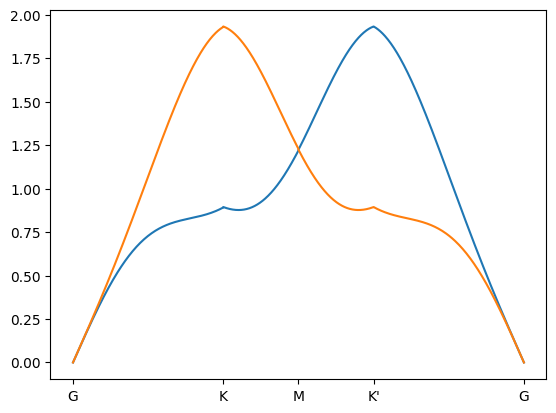

In [91]:
def plot_band():
    k_sym_points = [G,K,M,K2,G]
    k_label = ["G", "K", "M", "K2", "G"]
    k_point_path, k_path, Node = k_path_generation(k_sym_points)
    
    E_band = []
    for i in range(len(k_point_path)):
        test_E = np.array(list(map(E_DM, k_point_path[i])))
        E_band.append(test_E)
    
    shape = E_band[0].shape
    Node_label = []
    for n in k_label:
        print("n is:", n)
        if n == "G":
            Node_label.append(str("G"))
        elif n == "K2":
            Node_label.append(str("K'"))
        else:
            Node_label.append(str(n))
    
    print(Node_label)
            
    if len(shape) < 2:
        eig = np.hstack(tuple(E_band))
        plt.plot(k_path, eig_1)
        plt.xticks(Node,Node_label)
        plt,show()
        
        return 
        
    for i in range(shape[1]):
        eig_test = np.hstack((Eig_gk_dm[:,i],Eig_km_dm[:,i],Eig_mk2_dm[:,i],Eig_k2g_dm[:,i]))
        
        plt.plot(k_path, eig_test)
        plt.xticks(Node,Node_label)
    plt.show()
        
plot_band()

In [ ]:
Eig_gk = np.array(list(map(E,kgk)))
Eig_km = np.array(list(map(E,kkm)))
Eig_mk2 = np.array(list(map(E,kmk2)))
Eig_k2g = np.array(list(map(E,kk2g)))
eig_1 = np.hstack((Eig_gk,Eig_km,Eig_mk2,Eig_k2g))

Eig_gk_dm = np.array(list(map(E_DM,kgk)))
Eig_km_dm = np.array(list(map(E_DM,kkm)))
Eig_mk2_dm = np.array(list(map(E_DM,kmk2)))
Eig_k2g_dm = np.array(list(map(E_DM,kk2g)))
eig_1_dm = np.hstack((Eig_gk_dm[:,0],Eig_km_dm[:,0],Eig_mk2_dm[:,0],Eig_k2g_dm[:,0]))
eig_2_dm = np.hstack((Eig_gk_dm[:,1],Eig_km_dm[:,1],Eig_mk2_dm[:,1],Eig_k2g_dm[:,1]))

#plt.plot(kpath, eig_1)
plt.plot(kpath, eig_1_dm)
plt.plot(kpath, eig_2_dm)
plt.xticks(Node,[r'$\Gamma$','K','M',"K\'",r'$\Gamma$'])
plt.show()